In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the data 
data= pd.read_excel('CHURNDATA.xlsx')

In [4]:
#Data understanding 
data.head()

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [5]:
data.shape

(1249, 28)

In [6]:
data.columns

Index(['CIF', 'CUS_DOB', 'AGE', 'CUS_Month_Income', 'CUS_Gender',
       'CUS_Marital_Status', 'CUS_Customer_Since', 'YEARS_WITH_US',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CIF                                 1249 non-null   object        
 1   CUS_DOB                             1249 non-null   object        
 2   AGE                                 1249 non-null   int64         
 3   CUS_Month_Income                    1238 non-null   float64       
 4   CUS_Gender                          1247 non-null   object        
 5   CUS_Marital_Status                  1249 non-null   object        
 6   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 7   YEARS_WITH_US                       1249 non-null   int64         
 8   # total debit transactions for S1   1249 non-null   int64         
 9   # total debit transactions for S2   1249 non-null   int64         
 10  # total debit transactio

#Checking for unique values in each column in the dataset
col_uni={}
for col in data.columns:
    col
    uni=data[col].unique()
    col_uni[col]=uni
col_uni    

In [9]:
data["TAR_Desc"].unique()
#correcting the spelling
data["TAR_Desc"] = data["TAR_Desc"].replace("MIDLE", "MIDDLE")

In [10]:
# checking for null values in each column 
col_nan={}
for col in data.columns:
    n=data[col].isnull().sum()
    col_nan[col]=n
col_nan  

{'CIF': 0,
 'CUS_DOB': 0,
 'AGE': 0,
 'CUS_Month_Income': 11,
 'CUS_Gender': 2,
 'CUS_Marital_Status': 0,
 'CUS_Customer_Since': 0,
 'YEARS_WITH_US': 0,
 '# total debit transactions for S1': 0,
 '# total debit transactions for S2': 0,
 '# total debit transactions for S3': 0,
 'total debit amount for S1': 0,
 'total debit amount for S2': 0,
 'total debit amount for S3': 0,
 '# total credit transactions for S1': 0,
 '# total credit transactions for S2': 0,
 '# total credit transactions for S3': 0,
 'total credit amount for S1': 0,
 'total credit amount for S2': 0,
 'total credit amount for S3': 0,
 'total debit amount': 0,
 'total debit transactions': 0,
 'total credit amount': 0,
 'total credit transactions': 0,
 'total transactions': 0,
 'CUS_Target': 0,
 'TAR_Desc': 0,
 'Status': 0}

In [11]:
#handling null values or Imputing null values
data[data['CUS_Gender'].isnull()]

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
184,XXXXXX,Jan 1 1900 12:00AM,119,NaN,NaN,MARRIED,1998-01-20,21,4,4,...,2000.0,0.0,18649.3,9,2000.00,1,10,2223,LOW,CHURN
996,XXXXXX,Jan 1 1900 12:00AM,119,NaN,NaN,SINGLE,1998-01-07,21,27,0,...,0.0,0.0,43318.0,27,39250.86,5,32,2233,LOW,CHURN


<AxesSubplot:xlabel='CUS_Gender', ylabel='count'>

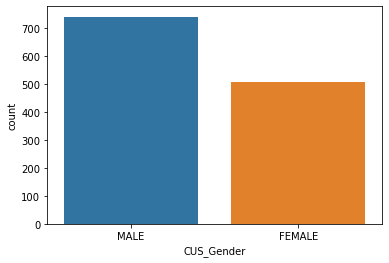

In [12]:
sns.countplot(data=data, x="CUS_Gender")

In [13]:
# Replacing NAN with 'MALE': as MALE having more occurance 
data['CUS_Gender']=data['CUS_Gender'].fillna('MALE')

In [14]:
# Null values in CUS_Month_Income

data[data['CUS_Month_Income'].isnull()]

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
85,XXXXXX,Apr 3 1957 12:00AM,62,NaN,FEMALE,SINGLE,1996-05-07,23,21,17,...,0.00,0.00,82043.30,47,0.00,0,47,2223,LOW,ACTIVE
99,XXXXXX,Dec 31 1953 12:00AM,66,NaN,FEMALE,MARRIED,1998-01-20,21,11,25,...,24294.55,26893.50,101900.00,58,75482.60,32,90,2223,LOW,ACTIVE
184,XXXXXX,Jan 1 1900 12:00AM,119,NaN,MALE,MARRIED,1998-01-20,21,4,4,...,2000.00,0.00,18649.30,9,2000.00,1,10,2223,LOW,CHURN
316,XXXXXX,Jan 2 1975 12:00AM,44,NaN,MALE,SINGLE,2005-05-26,14,0,2,...,0.00,0.00,1000.00,2,0.00,0,2,2222,MIDDLE,CHURN
368,XXXXXX,May 7 1976 12:00AM,43,NaN,MALE,SINGLE,2005-06-07,14,22,56,...,125400.78,41800.26,229406.14,101,250801.56,12,113,2222,MIDDLE,ACTIVE
400,XXXXXX,Jul 15 1963 12:00AM,56,NaN,MALE,SINGLE,1995-03-17,24,26,20,...,0.00,0.00,297687.54,46,0.00,0,46,2222,MIDDLE,CHURN
427,XXXXXX,Dec 7 1963 12:00AM,56,NaN,MALE,SINGLE,1991-11-09,28,9,14,...,18550.72,0.00,26745.00,25,18550.72,1,26,2223,LOW,ACTIVE
857,XXXXXX,Feb 2 1961 12:00AM,58,NaN,FEMALE,SINGLE,1997-01-13,22,37,68,...,80679.78,180922.70,276279.95,152,261602.48,8,160,2223,LOW,ACTIVE
938,XXXXXX,Mar 13 1976 12:00AM,43,NaN,FEMALE,MARRIED,1996-07-25,23,6,6,...,0.00,2900.00,9751.20,21,2900.00,1,22,2222,MIDDLE,ACTIVE
996,XXXXXX,Jan 1 1900 12:00AM,119,NaN,MALE,SINGLE,1998-01-07,21,27,0,...,0.00,0.00,43318.00,27,39250.86,5,32,2233,LOW,CHURN


<AxesSubplot:xlabel='CUS_Month_Income', ylabel='count'>

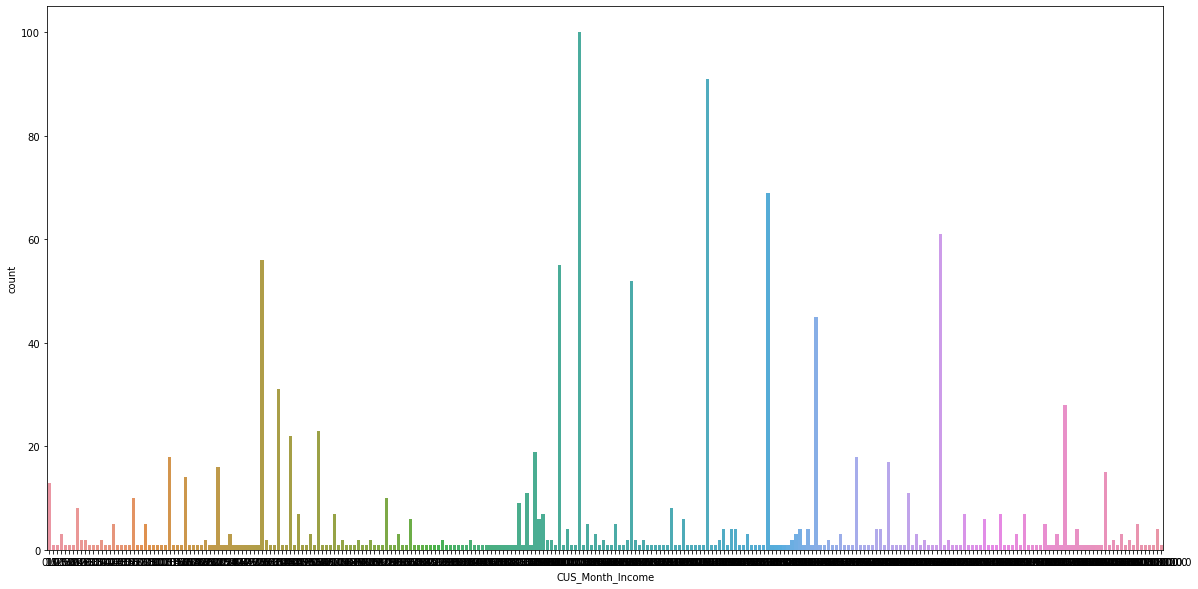

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x="CUS_Month_Income")

<AxesSubplot:ylabel='CUS_Month_Income'>

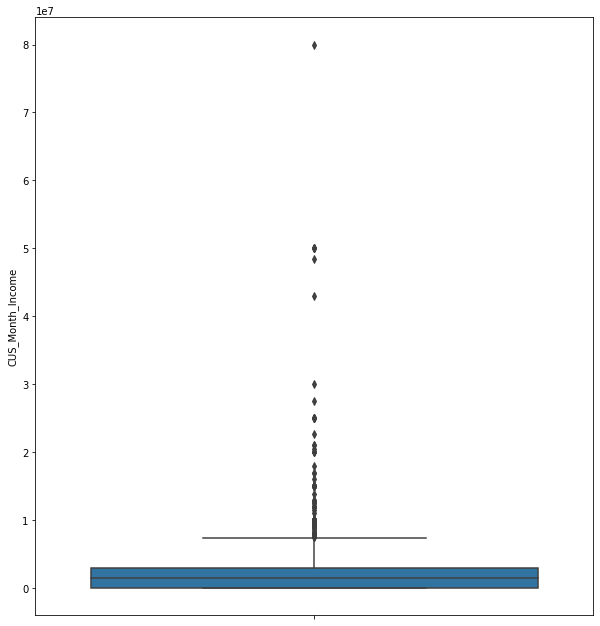

In [16]:
plt.figure(figsize=(10,11))
sns.boxplot(data=data, y='CUS_Month_Income')

In [17]:
data['CUS_Month_Income'].describe()

count    1.238000e+03
mean     2.764869e+06
std      5.406761e+06
min      0.000000e+00
25%      7.568750e+03
50%      1.500000e+06
75%      3.000000e+06
max      8.000000e+07
Name: CUS_Month_Income, dtype: float64

In [18]:
data['CUS_Month_Income'].mode()

0    1000000.0
dtype: float64

In [19]:
#Replacing Nan with min i.e 0 value
data['CUS_Month_Income']=data['CUS_Month_Income'].fillna(0)

In [20]:
data=data.dropna()

In [21]:
data.isnull().sum()

CIF                                   0
CUS_DOB                               0
AGE                                   0
CUS_Month_Income                      0
CUS_Gender                            0
CUS_Marital_Status                    0
CUS_Customer_Since                    0
YEARS_WITH_US                         0
# total debit transactions for S1     0
# total debit transactions for S2     0
# total debit transactions for S3     0
total debit amount for S1             0
total debit amount for S2             0
total debit amount for S3             0
# total credit transactions for S1    0
# total credit transactions for S2    0
# total credit transactions for S3    0
total credit amount for S1            0
total credit amount for S2            0
total credit amount for S3            0
total debit amount                    0
total debit transactions              0
total credit amount                   0
total credit transactions             0
total transactions                    0


In [22]:
#checking for duplicate records
print(f"no duplicates: {data.duplicated().sum()}")

no duplicates: 0


In [23]:
#Transferoming data to datetime format and extracting year 
#CUS_DOB
data['CUS_DOB']=pd.to_datetime(data['CUS_DOB'])
data['CUS_DOB']=pd.DatetimeIndex(data['CUS_DOB']).year

In [24]:
#'CUS_Customer_Since'
data['CUS_Customer_Since']=pd.to_datetime(data['CUS_Customer_Since'])
data['CUS_Customer_Since']=pd.DatetimeIndex(data['CUS_Customer_Since']).year


In [25]:
#Drop- column not impacting the dataset or not having proper data
#CIF column having encoded 'XXXX' value which is not useful for the analysis 
data.drop('CIF', axis=1, inplace=True)

In [26]:
# check columns which are same features differs in representation: like date of birth and age will represent same feature 
dfage=2019-data['CUS_DOB']
data[dfage!=data['AGE']]['AGE']

Series([], Name: AGE, dtype: int64)

In [27]:
data.drop('CUS_DOB',axis=1,inplace=True)

In [28]:
dfcs=2019-data['CUS_Customer_Since']
data[dfcs!=data['YEARS_WITH_US']]['YEARS_WITH_US']

Series([], Name: YEARS_WITH_US, dtype: int64)

In [29]:
data.drop('CUS_Customer_Since', axis=1,inplace=True)

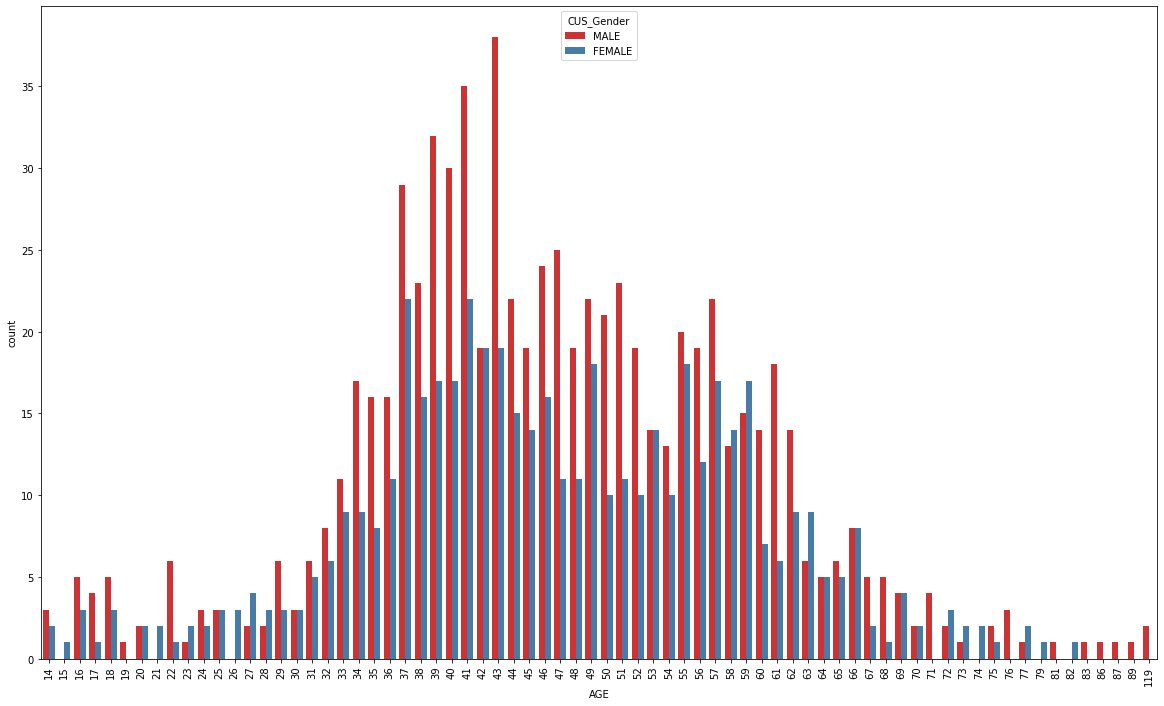

In [30]:
plt.figure(figsize=(20,12))
chart=sns.countplot(x='AGE', data=data, hue='CUS_Gender',palette='Set1') 
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

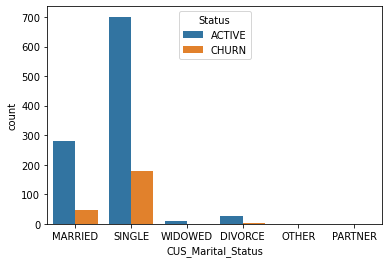

In [31]:
sns.countplot(data=data, x="CUS_Marital_Status", hue="Status")
plt.show()

<AxesSubplot:xlabel='TAR_Desc', ylabel='YEARS_WITH_US'>

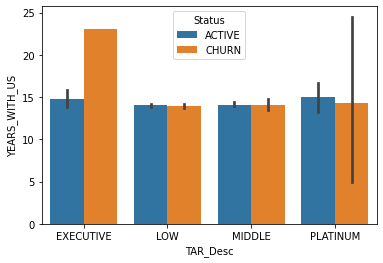

In [32]:
sns.barplot(data=data, x="TAR_Desc", y="YEARS_WITH_US", hue="Status")

<AxesSubplot:xlabel='TAR_Desc', ylabel='count'>

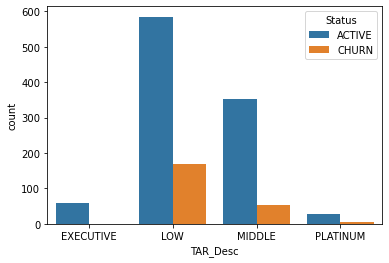

In [33]:
sns.countplot(data=data, x="TAR_Desc", hue="Status")

In [ ]:
# Outliers
for col in data._get_numeric_data():
  plt.figure(figsize=(10,5))
  sns.boxplot(data[col])
  plt.title(col)
  plt.show()
    

<AxesSubplot:xlabel='total transactions', ylabel='total debit transactions'>

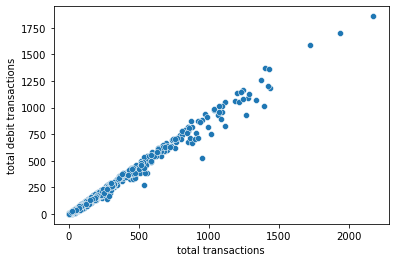

In [35]:
sns.scatterplot(data=data, x="total transactions", y="total debit transactions")


In [36]:
data.corr()

,AGE,CUS_Month_Income,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,...,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target
AGE,1.000000,0.106146,0.143234,-0.059585,-0.069276,-0.054500,-0.008780,-0.013651,-0.010965,-0.051233,...,-0.069688,0.006012,-0.004177,-0.020717,-0.013122,-0.063881,-0.005686,-0.070961,-0.067462,-0.018540
CUS_Month_Income,0.106146,1.000000,-0.091548,0.122196,0.116526,0.065854,0.054587,0.043107,0.076968,0.111866,...,0.031411,0.008004,0.056563,0.003562,0.067017,0.105701,0.020865,0.089621,0.107566,-0.041146
YEARS_WITH_US,0.143234,-0.091548,1.000000,0.067141,0.074229,0.114925,0.004131,0.014114,-0.025472,0.099793,...,0.087701,0.026008,0.041630,0.037528,0.000193,0.089907,0.036324,0.099473,0.094888,0.065403
# total debit transactions for S1,-0.059585,0.122196,0.067141,1.000000,0.892302,0.828796,0.313907,0.337218,0.445630,0.640056,...,0.542818,0.297500,0.404392,0.346020,0.423062,0.948161,0.366305,0.642397,0.941300,-0.105006
# total debit transactions for S2,-0.069276,0.116526,0.074229,0.892302,1.000000,0.886383,0.305362,0.416645,0.464250,0.604065,...,0.580254,0.324077,0.490128,0.394651,0.457207,0.969002,0.419265,0.661888,0.962775,-0.116700
# total debit transactions for S3,-0.054500,0.065854,0.114925,0.828796,0.886383,1.000000,0.296926,0.403801,0.537864,0.578322,...,0.664238,0.341784,0.480467,0.461279,0.469841,0.948973,0.447380,0.668464,0.945833,-0.081095
total debit amount for S1,-0.008780,0.054587,0.004131,0.313907,0.305362,0.296926,1.000000,0.651512,0.409369,0.176090,...,0.148335,0.603362,0.543770,0.492062,0.872000,0.319550,0.591813,0.176883,0.311450,-0.210314
total debit amount for S2,-0.013651,0.043107,0.014114,0.337218,0.416645,0.403801,0.651512,1.000000,0.542596,0.212619,...,0.217926,0.889119,0.803394,0.878745,0.887447,0.404283,0.925790,0.242716,0.396801,-0.106770
total debit amount for S3,-0.010965,0.076968,-0.025472,0.445630,0.464250,0.537864,0.409369,0.542596,1.000000,0.278227,...,0.326823,0.479697,0.557741,0.591397,0.719133,0.506063,0.575376,0.324779,0.499759,-0.251772
# total credit transactions for S1,-0.051233,0.111866,0.099793,0.640056,0.604065,0.578322,0.176090,0.212619,0.278227,1.000000,...,0.731521,0.220053,0.290092,0.255212,0.255412,0.635421,0.268126,0.923109,0.702775,-0.000141


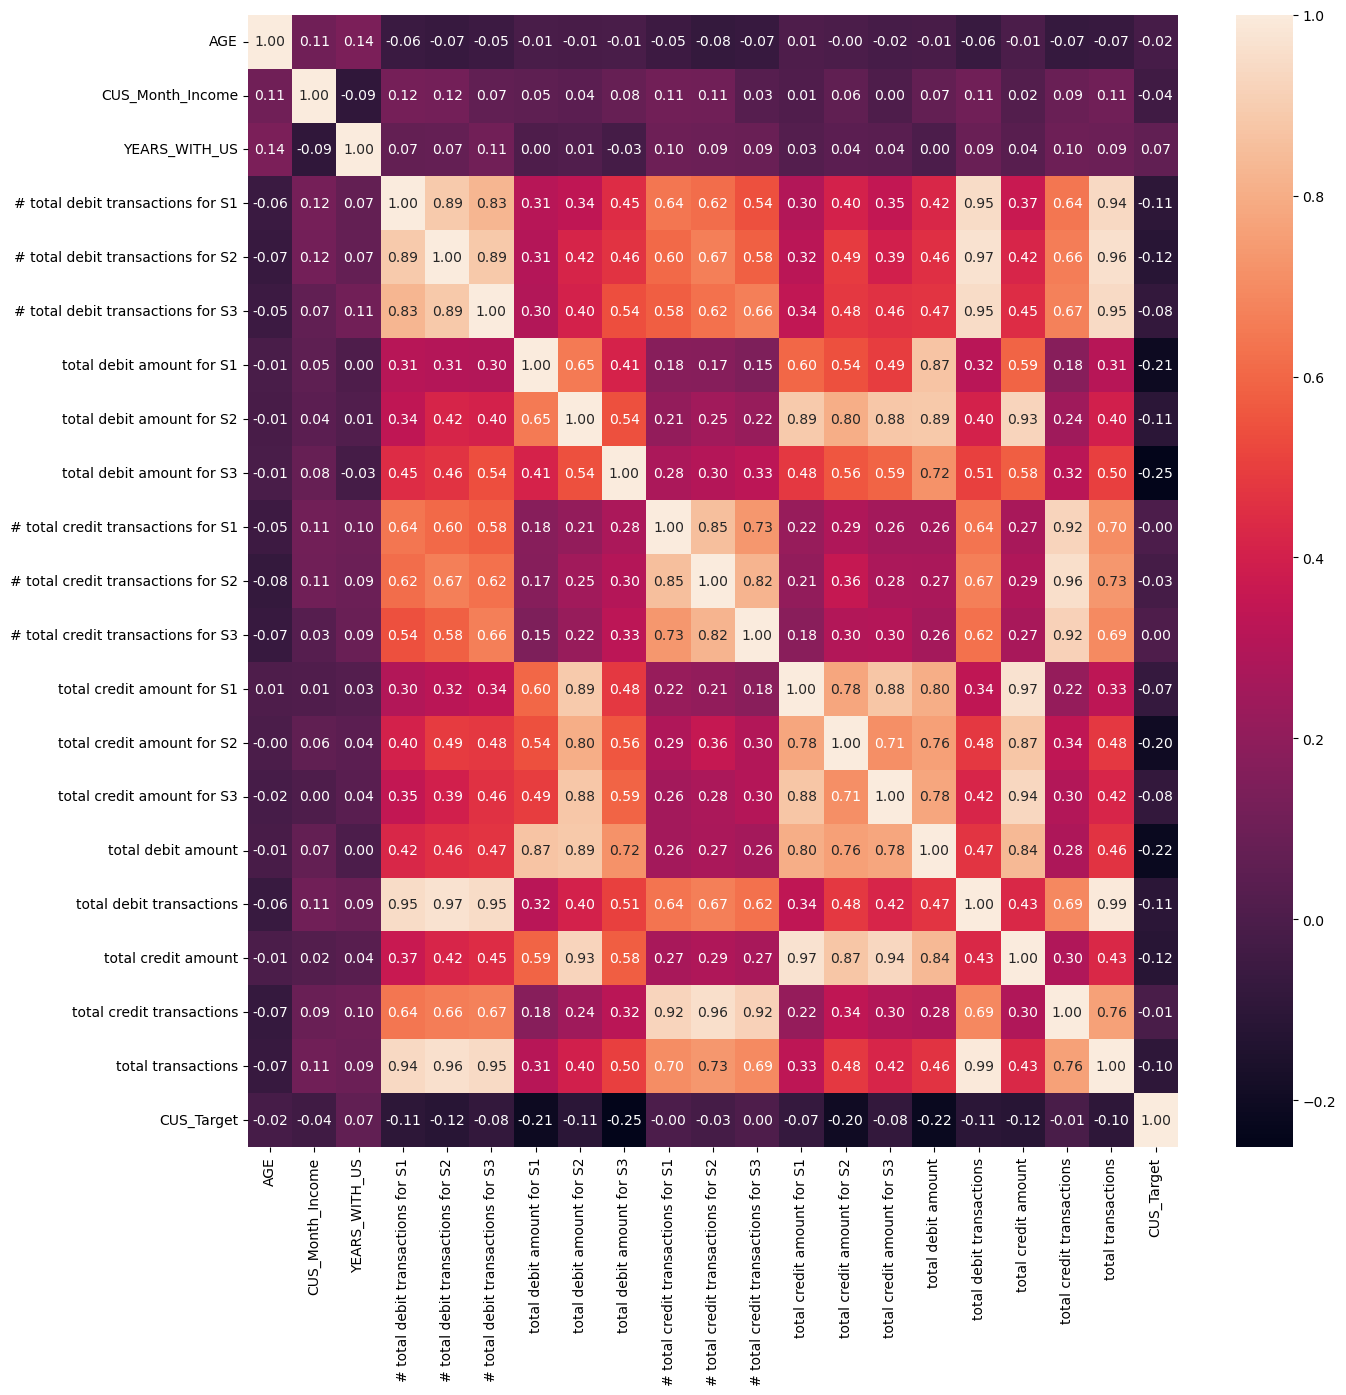

In [37]:
plt.figure(figsize=(15,15), dpi=100)
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

In [38]:
data.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,25,277,265,345,1459126.64,1230543.08,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,14,37,15,45,35372.55,20134.00,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,14,31,14,8,28248.85,4777.66,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,14,0,1,0,0.00,4000.00,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,5,15,33,12,69083.38,223007.51,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [39]:
#Feature selection
data.drop(data.columns[5:17], axis=1, inplace=True)
data.drop(['total credit transactions','total debit transactions'], axis=1,inplace=True)

In [40]:
data.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total credit amount,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,25,4758311.63,5659653.33,952,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,14,139363.22,87000.00,107,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,14,37375.46,1020883.70,80,2222,MIDDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,14,4000.00,76946.96,13,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,5,338470.29,442100.00,81,2223,LOW,ACTIVE


<AxesSubplot:xlabel='Status', ylabel='count'>

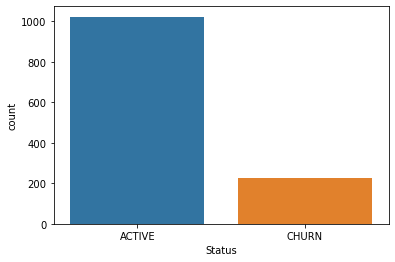

In [41]:
sns.countplot(data=data, x="Status")

In [42]:
#Status
data['Status'].unique()
data['Status']=pd.to_numeric(data['Status'].replace(['ACTIVE', 'CHURN'],[0,1]))
data['Status'].dtype

dtype('int64')

In [43]:
#Gender
data['CUS_Gender'].unique()
    
data['CUS_Gender']=pd.to_numeric(data['CUS_Gender'].replace(['FEMALE', 'MALE'],[0,1]))
data['Status'].dtype

dtype('int64')

In [44]:
data['CUS_Marital_Status'].unique()
data['CUS_Marital_Status']=pd.to_numeric(data['CUS_Marital_Status'].replace(['MARRIED', 'SINGLE', 'WIDOWED', 'DIVORCE', 'OTHER', 'PARTNER'],[0,1,2,3,4,5]))
data['CUS_Marital_Status'].dtype

dtype('int64')

In [45]:
data['TAR_Desc'].unique()
data['TAR_Desc']=pd.to_numeric(data['TAR_Desc'].replace(['EXECUTIVE', 'LOW', 'MIDDLE', 'PLATINUM'],[0,1,2,3]))
data['TAR_Desc'].dtype

dtype('int64')

#from sklearn.preprocessing import OneHotEncoder
df_mari=pd.get_dummies(data['CUS_Marital_Status'])#drop_first=True
df_mari.head()
df_tar=pd.get_dummies(data['TAR_Desc'])
df_tar.head()


In [47]:
datatr=data.copy()
#datatr= pd.concat([df_mari,df_tar,datatr], axis = 1)
datatr.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total credit amount,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,1,0,25,4758311.63,5659653.33,952,2231,0,0
1,46,1500000.00,0,1,14,139363.22,87000.00,107,2223,1,0
2,53,5000000.00,0,1,14,37375.46,1020883.70,80,2222,2,0
3,15,500.00,0,1,14,4000.00,76946.96,13,2223,1,0
4,48,9000000.00,0,1,5,338470.29,442100.00,81,2223,1,0


 Drop the one hot encoded columns
datatr.drop(['CUS_Marital_Status','TAR_Desc'], axis=1,inplace=True)


In [48]:
#datatr.info()

In [49]:
#datatr.head()

In [50]:
datatr.shape

(1249, 11)

In [51]:
np.any(np.isnan(datatr))

False

In [52]:

np.all(np.isfinite(datatr))

True

In [53]:
datatr["Status"].value_counts() # quite imbalanced data

0    1022
1     227
Name: Status, dtype: int64

In [54]:
# Synthetic Minority Over-Sampling Technique(SMOTE): Upsample- resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

datatr_major = datatr[datatr["Status"]==0]
datatr_minor = datatr[datatr["Status"]==1]
datatr_minor_upsampled = resample(datatr_minor,replace=True,n_samples=1015, random_state=20)
#Combine majority class with upsampled minority class
df_upsampled = pd.concat([datatr_major, datatr_minor_upsampled], axis=0)

#sm = SMOTE(random_state=20)
#X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


In [55]:
print(f"orginal: {datatr.Status.value_counts()}")
print(f"\nafter upsample: {df_upsampled.Status.value_counts()}")

orginal: 0    1022
1     227
Name: Status, dtype: int64

after upsample: 0    1022
1    1015
Name: Status, dtype: int64


In [56]:
df_upsampled

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total credit amount,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,1,0,25,4758311.63,5659653.33,952,2231,0,0
1,46,1500000.00,0,1,14,139363.22,87000.00,107,2223,1,0
2,53,5000000.00,0,1,14,37375.46,1020883.70,80,2222,2,0
3,15,500.00,0,1,14,4000.00,76946.96,13,2223,1,0
4,48,9000000.00,0,1,5,338470.29,442100.00,81,2223,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1239,56,5000000.00,1,0,14,2749.54,0.00,18,2223,1,1
615,47,1000000.00,1,1,14,225.00,0.00,3,2223,1,1
1187,57,2700000.00,1,1,13,1250.00,0.00,2,2223,1,1
41,46,2000000.00,1,1,14,44155.00,8500.00,21,2223,1,1


In [57]:
df_upsampled.shape

(2037, 11)

In [58]:
# separating X and y variables
X =df_upsampled.drop("Status", axis=1)
y = df_upsampled.loc[:,"Status"].values.ravel()

In [59]:
#Sampling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

In [60]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1629, 10)
(1629,)
(408, 10)
(408,)


In [61]:
from sklearn.ensemble import ExtraTreesClassifier
m=ExtraTreesClassifier()
m.fit(X,y)


ExtraTreesClassifier()

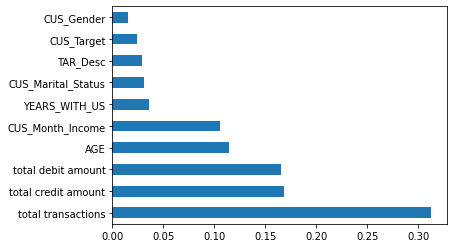

In [62]:
imp_featrs= pd.Series(m.feature_importances_, index=X.columns)
imp_featrs.nlargest(10).plot(kind='barh')
plt.show()

In [63]:
X

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total credit amount,total transactions,CUS_Target,TAR_Desc
0,49,7116.64,1,0,25,4758311.63,5659653.33,952,2231,0
1,46,1500000.00,0,1,14,139363.22,87000.00,107,2223,1
2,53,5000000.00,0,1,14,37375.46,1020883.70,80,2222,2
3,15,500.00,0,1,14,4000.00,76946.96,13,2223,1
4,48,9000000.00,0,1,5,338470.29,442100.00,81,2223,1
...,...,...,...,...,...,...,...,...,...,...
1239,56,5000000.00,1,0,14,2749.54,0.00,18,2223,1
615,47,1000000.00,1,1,14,225.00,0.00,3,2223,1
1187,57,2700000.00,1,1,13,1250.00,0.00,2,2223,1
41,46,2000000.00,1,1,14,44155.00,8500.00,21,2223,1


In [64]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [65]:
X_train

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total credit amount,total transactions,CUS_Target,TAR_Desc
711,38,2000000.0,0,1,14,8450135.30,7685863.08,852,2236,0
47,52,180.0,1,0,4,53328.96,0.00,17,2222,2
698,39,2450.0,1,1,14,0.00,50.00,1,2223,1
1154,45,5000000.0,1,1,14,2337126.87,809024.00,589,2222,2
531,56,6000.0,0,1,14,416679.60,86000.00,103,2223,1
...,...,...,...,...,...,...,...,...,...,...
1132,62,3500.0,1,1,14,151799.70,160587.47,68,2223,1
328,31,500000.0,1,1,14,5400.00,5000.00,6,2222,2
338,33,100000.0,1,1,14,1367461.02,2139478.63,832,2232,2
593,41,2000000.0,0,1,14,2672157.23,787625.00,536,2222,2


In [66]:
datatr.columns

Index(['AGE', 'CUS_Month_Income', 'CUS_Gender', 'CUS_Marital_Status',
       'YEARS_WITH_US', 'total debit amount', 'total credit amount',
       'total transactions', 'CUS_Target', 'TAR_Desc', 'Status'],
      dtype='object')

In [67]:
X_train

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total credit amount,total transactions,CUS_Target,TAR_Desc
711,38,2000000.0,0,1,14,8450135.30,7685863.08,852,2236,0
47,52,180.0,1,0,4,53328.96,0.00,17,2222,2
698,39,2450.0,1,1,14,0.00,50.00,1,2223,1
1154,45,5000000.0,1,1,14,2337126.87,809024.00,589,2222,2
531,56,6000.0,0,1,14,416679.60,86000.00,103,2223,1
...,...,...,...,...,...,...,...,...,...,...
1132,62,3500.0,1,1,14,151799.70,160587.47,68,2223,1
328,31,500000.0,1,1,14,5400.00,5000.00,6,2222,2
338,33,100000.0,1,1,14,1367461.02,2139478.63,832,2232,2
593,41,2000000.0,0,1,14,2672157.23,787625.00,536,2222,2


## Logistic Regression

In [68]:
#Trining the model(No Feature scaling)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [69]:
predicted=model.predict(X_test)
expected=y_test

In [70]:
from sklearn import metrics

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.81      0.41      0.55       229
           1       0.54      0.88      0.67       179

    accuracy                           0.62       408
   macro avg       0.68      0.65      0.61       408
weighted avg       0.69      0.62      0.60       408

[[ 95 134]
 [ 22 157]]


In [71]:
from sklearn.metrics import accuracy_score

accuracy_score(expected,predicted)

0.6176470588235294

In [72]:
#Feature scaling
X_train_sc=X_train.copy()
X_test_sc=X_test.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_sc.iloc[:,[0,1,4,5,6,7,8]]) # Grnder is already label encoded 

X_train_sc.iloc[:,[0,1,4,5,6,7,8]] = scaler.transform(X_train_sc.iloc[:,[0,1,4,5,6,7,8]])
X_test_sc.iloc[:,[0,1,4,5,6,7,8]] = scaler.transform(X_test_sc.iloc[:,[0,1,4,5,6,7,8]])

In [73]:
#check the standard deviation 
X_train_sc.iloc[:,[0,1,4,5,6,7,8]].std()

AGE                    1.000307
CUS_Month_Income       1.000307
YEARS_WITH_US          1.000307
total debit amount     1.000307
total credit amount    1.000307
total transactions     1.000307
CUS_Target             1.000307
dtype: float64

In [74]:
model=LogisticRegression()
model.fit(X_train_sc, y_train)
predicted=model.predict(X_test_sc)
expected=y_test

In [75]:
from sklearn import metrics

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71       229
           1       0.63      0.83      0.72       179

    accuracy                           0.72       408
   macro avg       0.73      0.73      0.72       408
weighted avg       0.74      0.72      0.72       408

[[143  86]
 [ 30 149]]


In [76]:
from sklearn.metrics import accuracy_score

accuracy_score(expected,predicted)

0.7156862745098039

## XG Boost

In [77]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eta=0.05, gamma=3,learning_rate=0.05000000)
xgb.fit(X_train, y_train)

[14:55:22] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.05, gamma=3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
print(xgb.score(X_train, y_train)) # train accu
print(xgb.score(X_test, y_test)) # test accu

0.9422958870472683
0.8651960784313726


In [79]:
xgb_predictions = xgb.predict(X_test)

In [80]:
# Evaluation 
from sklearn.metrics import confusion_matrix, classification_report
xgb_cm = confusion_matrix(y_test, xgb_predictions)
xgb_cr = classification_report(y_test, xgb_predictions)
print(xgb_cm,"\n")
print(xgb_cr)

[[180  49]
 [  6 173]] 

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       229
           1       0.78      0.97      0.86       179

    accuracy                           0.87       408
   macro avg       0.87      0.88      0.87       408
weighted avg       0.89      0.87      0.87       408



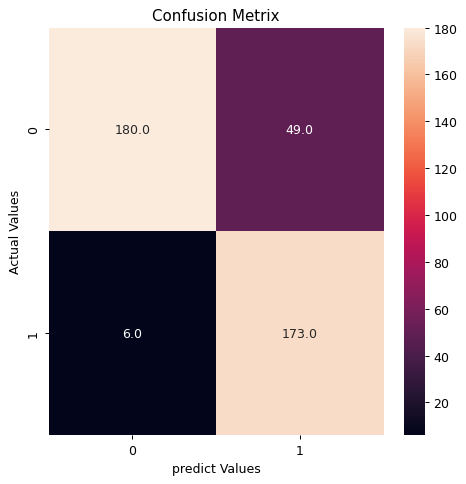

In [81]:
# plotting confusion metrix
plt.figure(figsize=(6,6), dpi=90)
sns.heatmap(xgb_cm, annot=True, fmt=".1f")
plt.title("Confusion Metrix")
plt.ylabel("Actual Values")
plt.xlabel("predict Values")
plt.show()

## Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rf,parameters,cv=5)

cv.fit(X_train, y_train)

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [82]:
#display(cv)

In [83]:
#print(cv.score(X_train, y_train)) # train accu
#print(cv.score(X_test, y_test)) # test accu

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
print(rf.score(X_train, y_train)) # train accu
print(rf.score(X_test, y_test)) # test accu

1.0
0.9215686274509803


In [86]:
rf_predictions = rf.predict(X_test)

In [87]:
# Evaluation 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, rf_predictions)
cr = classification_report(y_test, rf_predictions)
print(cm,"\n")
print(cr)

[[197  32]
 [  0 179]] 

              precision    recall  f1-score   support

           0       1.00      0.86      0.92       229
           1       0.85      1.00      0.92       179

    accuracy                           0.92       408
   macro avg       0.92      0.93      0.92       408
weighted avg       0.93      0.92      0.92       408



In [88]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,X,y,cv=10)
score

array([0.97058824, 0.93627451, 0.94607843, 0.93627451, 0.9754902 ,
       0.96078431, 0.91666667, 0.94581281, 0.90640394, 0.92610837])

In [89]:
import pickle
pickle_out = open("rf.pkl", "wb")
pickle.dump(rf, pickle_out)
pickle_out.close()

#pickle.dump(rf, open("rf.pkl", "wb" ))
#my_scaler = pickle.load(open("rf.pkl", "rb" ))
